
# CDS 2413
## Student Performance Analysis – Factors Affecting Exam Scores

**Dataset:** `StudentPerformanceFactors.csv`  
**Scope:** This notebook strictly covers CLO1 and CLO2 using techniques taught in class (Labs Week1–2): data wrangling, descriptive statistics, basic sampling, simple visualizations, correlations, and a one-sample t-test.



## Data Understanding & Preparation 

### Q1. What is the purpose of analyzing this dataset?
We aim to understand which factors most influence students’ **Exam_Score** (e.g., Hours_Studied, Attendance, Previous_Scores). Insights can support students and instructors by improving study plans, attendance policies, and tutoring allocation.

### Q2. Which programming language do we use, and why?
We use **Python** with **pandas** and **matplotlib** because they are the same tools used in class/labs, easy to read, and sufficient for data wrangling, descriptive analysis, and simple charts.

### Q3. What type of analysis will we perform, and why?
We focus on **Descriptive Analysis** (summary statistics, distributions, simple correlations) because it aligns with class coverage and CLO2. We avoid advanced/complex algorithms here.

### Q4. Identify the dependent and independent variables. 
- **Dependent (DV):** `Exam_Score`  
- **Independent (IVs):** `Hours_Studied`, `Attendance`, `Previous_Scores`, `Sleep_Hours`, `Tutoring_Sessions`, `Physical_Activity` (if present in the data).

### Q5. Will we use sampling? Which types and why? 
Yes. We use **Random Sampling** (to select a fair subset) and **Systematic Sampling** (every k-th record) to mirror class practice and compare results with the full dataset.


## Import Libraries and Load Dataset

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (ensure the CSV is in the same directory as this notebook)
data = pd.read_csv("StudentPerformanceFactors.csv")

# Basic preview
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Overview (shape, columns, dtypes)

In [2]:

data.shape  # (rows, columns)


(6607, 20)

In [3]:

list(data.columns)  # column names


['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [4]:

data.dtypes  # data types


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

## Missing Values and Simple Cleaning

In [5]:

# Check missing values
data.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:

# Fill numeric missing values with column mean (rounded to 1 decimal place)
data = data.copy()
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)

# Re-check missing values
data.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## Descriptive Statistics, Sampling, and Visualizations

### Q6. Why do we perform descriptive analysis?
To understand the overall level and spread of **Exam_Score**, detect outliers, and compare groups/samples. This supports clear, data-driven observations.


### Create a simple descriptive statistics function

In [7]:

def descriptive_stats(series: pd.Series) -> pd.DataFrame:
    s = pd.to_numeric(series, errors='coerce').dropna()
    return pd.DataFrame({
        "count": [s.count()],
        "mean": [s.mean()],
        "std": [s.std(ddof=1)],
        "min": [s.min()],
        "25%": [s.quantile(0.25)],
        "50% (median)": [s.median()],
        "75%": [s.quantile(0.75)],
        "max": [s.max()]
    })


### Descriptive statistics for the dependent variable (Exam_Score)

In [8]:

# Ensure the dependent variable exists
dv = "Exam_Score" if "Exam_Score" in data.columns else None
if dv is None:
    raise ValueError("Dependent variable 'Exam_Score' not found in the dataset.")

desc_dv = descriptive_stats(data[dv])
desc_dv


,count,mean,std,min,25%,50% (median),75%,max
0,6607,67.235659,3.890456,55,65.0,67.0,69.0,101



### Q7. How do we generate samples and what do they tell us?
We generate a **Random Sample (n=150)** and a **Systematic Sample** (every k-th row). Then we compare each sample’s descriptive statistics with the population to check representativeness.


### Random and Systematic Sampling

In [9]:

# Random sample (n=150 or full length if shorter)
rng = 42
sample_size = 150 if len(data) >= 150 else len(data)
sample_random = data.sample(n=sample_size, random_state=rng)
desc_random = descriptive_stats(sample_random[dv])

# Systematic sample: take every k-th row
k = max(1, len(data) // sample_size) if sample_size > 0 else 1
sys_idx = list(range(0, len(data), k))[:sample_size]
sample_systematic = data.iloc[sys_idx]
desc_systematic = descriptive_stats(sample_systematic[dv])

desc_random, desc_systematic


(   count       mean       std  min   25%  50% (median)   75%  max
 0    150  67.406667  4.122449   55  65.0          67.0  70.0   89,
    count       mean       std  min   25%  50% (median)   75%  max
 0    150  67.986667  4.714659   61  65.0          67.0  70.0   94)


### Q8. What do the visualizations show about the data?
- **Histogram**: overall distribution of exam scores (e.g., normal/left/right skew).  
- **Boxplot**: potential outliers.  
- **Scatter (Hours_Studied vs Exam_Score)**: linear trend presence.  
- **Heatmap**: strength of correlations among numeric variables.


### Visualize DV and relationships (matplotlib only)

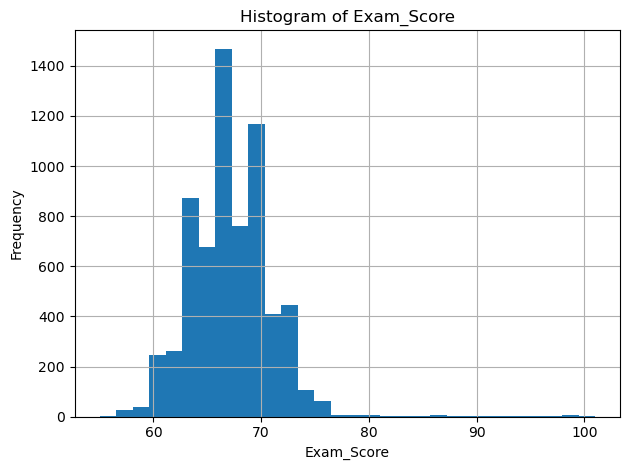

In [10]:

# Histogram for Exam_Score
plt.figure()
data[dv].hist(bins=30)
plt.title("Histogram of Exam_Score")
plt.xlabel("Exam_Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


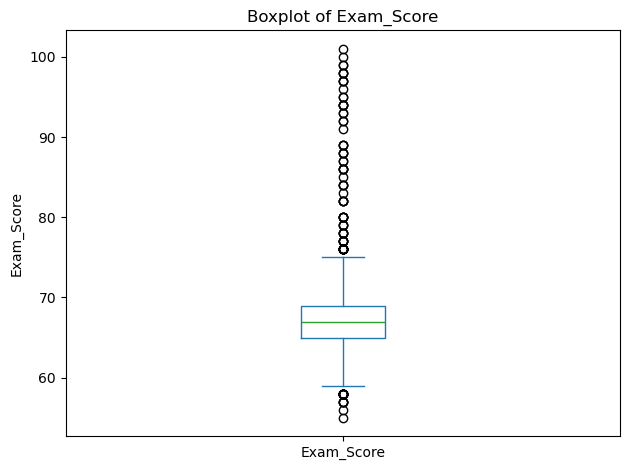

In [11]:

# Boxplot for Exam_Score
plt.figure()
data[dv].plot(kind="box")
plt.title("Boxplot of Exam_Score")
plt.ylabel("Exam_Score")
plt.tight_layout()
plt.show()


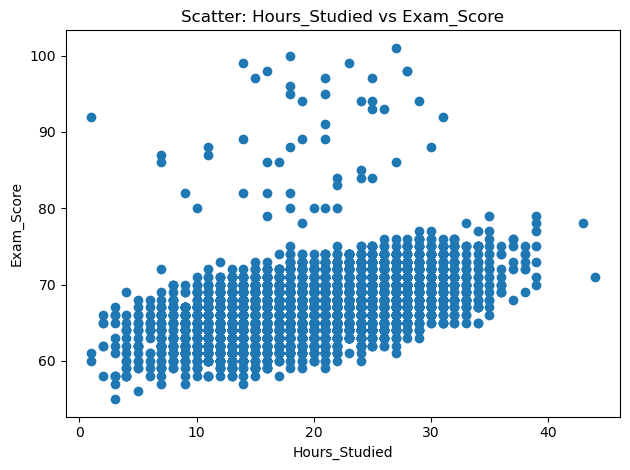

In [12]:

# Scatter: choose Hours_Studied if exists, else fall back to the strongest numeric predictor
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
x_var = "Hours_Studied" if "Hours_Studied" in data.columns else None

# If Hours_Studied not present, pick the numeric column with highest abs correlation to DV (excluding DV)
if x_var is None:
    corr_series = data[numeric_cols].corr()[dv].drop(labels=[dv])
    x_var = corr_series.abs().sort_values(ascending=False).index[0]

plt.figure()
plt.scatter(data[x_var], data[dv])
plt.title(f"Scatter: {x_var} vs {dv}")
plt.xlabel(x_var)
plt.ylabel(dv)
plt.tight_layout()
plt.show()


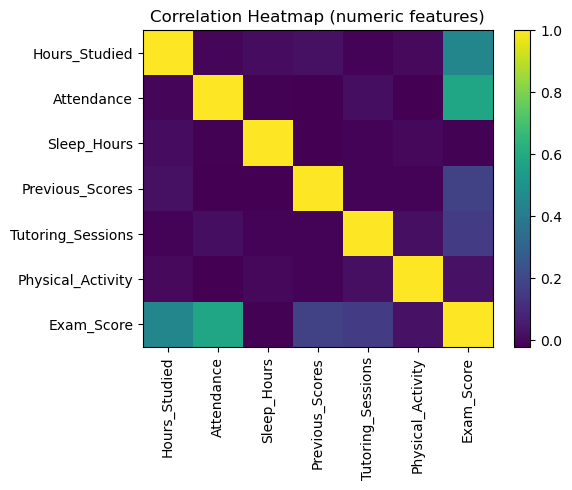

In [13]:

# Heatmap of numeric correlations (matplotlib)
corr = data[numeric_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr.values, aspect='auto')
plt.colorbar()
plt.xticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=np.arange(len(numeric_cols)), labels=numeric_cols)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()



### Q9. Is there a correlation between a key independent variable and Exam_Score?
We compute **Pearson** (linear) and **Spearman** (rank-based) correlations between the chosen IV and `Exam_Score`.


In [14]:

from scipy import stats

x = pd.to_numeric(data[x_var], errors='coerce')
y = pd.to_numeric(data[dv], errors='coerce')

pearson_r, pearson_p = stats.pearsonr(x.dropna(), y.loc[x.dropna().index])
spearman_rho, spearman_p = stats.spearmanr(x, y, nan_policy='omit')

{
    "independent_var": x_var,
    "pearson_r": pearson_r,
    "pearson_p": pearson_p,
    "spearman_rho": spearman_rho,
    "spearman_p": spearman_p
}


{'independent_var': 'Hours_Studied',
 'pearson_r': np.float64(0.44545495407528185),
 'pearson_p': np.float64(1.28635e-319),
 'spearman_rho': np.float64(0.48095596242825545),
 'spearman_p': np.float64(0.0)}


### Q10. Does the sample represent the population accurately?
We compare the **random sample’s mean** to the **population mean** of `Exam_Score` using a **one-sample t-test**. A large p-value suggests the sample mean is not significantly different from the population mean (good representativeness).


In [15]:

from scipy import stats

pop_mean = data[dv].mean()
t_stat, t_p = stats.ttest_1samp(sample_random[dv], pop_mean)

{"population_mean": pop_mean, "t_stat": t_stat, "p_value": t_p}


{'population_mean': np.float64(67.23565914938702),
 't_stat': np.float64(0.5080489230175042),
 'p_value': np.float64(0.6121703345045606)}


## Interpretations
- **Descriptive stats** show the central tendency and spread of `Exam_Score` to understand overall performance.
- **Random vs Systematic samples**: compare their means/medians with the population to judge representativeness.
- **Charts**: Histogram & Boxplot reveal distribution and outliers; Scatter suggests strength/direction of a relationship; Heatmap highlights the strongest numeric associations.
- **Correlation tests**: Significant Pearson/Spearman values indicate a meaningful relationship between the chosen IV and `Exam_Score`.
- **One-sample t-test**: If p-value is high (e.g., > 0.05), the sample mean is consistent with the population mean.



# Predictive Modelling

> **Scope:** Regression (R², MSE), Classification (LR, KNN, NB, DT with Accuracy + Confusion Matrix), Clustering (Elbow + KMeans + Dendrogram + Agglomerative).  
> **Dataset:** `StudentPerformanceFactors.csv`


## Setup

In [16]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

data = pd.read_csv("StudentPerformanceFactors.csv")



## Part A - Regression
**Q11. What are we predicting and which features do we use?**  
We predict the continuous **Exam_Score** using simple numeric drivers taught in class: `Hours_Studied`, `Attendance`, `Previous_Scores`, `Sleep_Hours`, `Tutoring_Sessions`, `Physical_Activity` (when present).

**Q12. How well does a simple Linear Regression fit?**  
Report **R²** (closer to 1 is better) and **MSE** (lower is better).

In [17]:

features = [c for c in ["Hours_Studied","Attendance","Previous_Scores","Sleep_Hours","Tutoring_Sessions","Physical_Activity"] if c in data.columns]
dv = "Exam_Score"
df_reg = data[features+[dv]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_reg[features], df_reg[dv], test_size=0.25, random_state=42)

lin = LinearRegression().fit(X_train, y_train)
y_pred = lin.predict(X_test)
print("R²:", round(r2_score(y_test, y_pred),4), "| MSE:", round(mean_squared_error(y_test, y_pred),4))
print("Coefficients:", dict(zip(features, np.round(lin.coef_,3))))


R²: 0.6508 | MSE: 4.7568
Coefficients: {'Hours_Studied': np.float64(0.29), 'Attendance': np.float64(0.199), 'Previous_Scores': np.float64(0.048), 'Sleep_Hours': np.float64(-0.028), 'Tutoring_Sessions': np.float64(0.513), 'Physical_Activity': np.float64(0.153)}


**Interpretation:** Higher R² and lower MSE indicate a better linear fit; coefficients show each feature’s linear impact.

حط فورملا ويك ٧ -٨ سلايد ٧


## Part B - Classification (Pass/Fail)
**Q13. How do we define the target?**  
We set **Pass = 1** if `Exam_Score ≥ 60`, otherwise **Fail = 0**.

**Q14. Which models do we compare and how?**  
We train **Logistic Regression, KNN (k=5), Naive Bayes, Decision Tree** and compare **Accuracy** + show **Confusion Matrix**.

In [18]:
df_cls = data[features+[dv]].dropna().copy()
df_cls["Pass"] = (df_cls[dv] >= 60).astype(int)
X = df_cls[features].values
y = df_cls["Pass"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
sc = StandardScaler()
X_train_s, X_test_s = sc.fit_transform(X_train), sc.transform(X_test)

results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_s, y_train)
results["Logistic Regression"] = (accuracy_score(y_test, lr.predict(X_test_s)), confusion_matrix(y_test, lr.predict(X_test_s)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_s, y_train)
results["KNN (k=5)"] = (accuracy_score(y_test, knn.predict(X_test_s)), confusion_matrix(y_test, knn.predict(X_test_s)))

# Naive Bayes
nb = GaussianNB().fit(X_train_s, y_train)
results["Naive Bayes"] = (accuracy_score(y_test, nb.predict(X_test_s)), confusion_matrix(y_test, nb.predict(X_test_s)))

# Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", random_state=42).fit(X_train, y_train)
results["Decision Tree"] = (accuracy_score(y_test, dt.predict(X_test)), confusion_matrix(y_test, dt.predict(X_test)))

for name, (acc, cm) in results.items():
    print(f"\n{name}: Accuracy = {acc:.4f}\nConfusion Matrix:\n{cm}")

best = max(results, key=lambda k: results[k][0])
print("\nBest by Accuracy:", best, "->", round(results[best][0],4))



Logistic Regression: Accuracy = 0.9915
Confusion Matrix:
[[   5   12]
 [   2 1633]]

KNN (k=5): Accuracy = 0.9909
Confusion Matrix:
[[   2   15]
 [   0 1635]]

Naive Bayes: Accuracy = 0.9903
Confusion Matrix:
[[   3   14]
 [   2 1633]]

Decision Tree: Accuracy = 0.9788
Confusion Matrix:
[[   5   12]
 [  23 1612]]

Best by Accuracy: Logistic Regression -> 0.9915


**Interpretation:** The highest **Accuracy** indicates the best classifier within course scope; the **Confusion Matrix** shows TP/TN vs FP/FN to judge errors.


## Part C - Clustering
**Q15. How many clusters should we try?**  
Use **Elbow** (WCSS curve) and **Dendrogram** to justify **k**. For simplicity, we demo **k=4**.

**Q16. What are the clusters telling us?**  
On 2 features (`Hours_Studied`, `Attendance`), clusters separate students into groups (e.g., low-hours/low-attendance) to guide interventions.


### Final Notes
- **Regression:** report R², MSE; read coefficients simply.  
- **Classification:** LR/KNN/NB/DT with Accuracy + Confusion Matrix; pick best.  
- **Clustering:** justify k with Elbow/Dendrogram; interpret groups in plain language.



## Part C - Clustering

Below we split clustering into **four** small cells (Elbow → K‑Means → Dendrogram → Hierarchical)


In [19]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

try:
    _ = data.head(1)
except NameError:
    data = pd.read_csv("StudentPerformanceFactors.csv")

clu_feats = [c for c in ["Hours_Studied","Attendance"] if c in data.columns]
assert len(clu_feats)==2, "Need Hours_Studied and Attendance for 2D clustering."
df_clu = data[clu_feats].dropna().copy()

Z = StandardScaler().fit_transform(df_clu.values)

C:\Users\Nyx\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Nyx\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Nyx\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Nyx\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

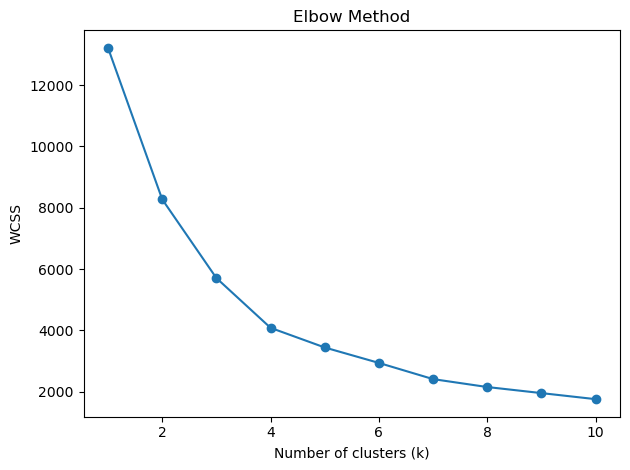

In [20]:

# (1) Elbow Method
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", n_init="auto", random_state=42)
    km.fit(Z)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.tight_layout()
plt.show()


**Interpretation:** Choose **k** where the WCSS curve starts to bend (the “elbow”).

C:\Users\Nyx\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(


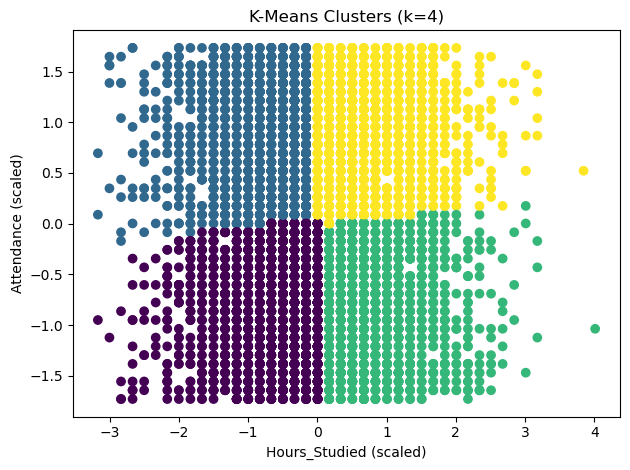

In [21]:

# (2) K-Means using k=4
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, init="k-means++", n_init="auto", random_state=42)
labels_km = kmeans.fit_predict(Z)

plt.figure()
plt.scatter(Z[:,0], Z[:,1], c=labels_km)
plt.title(f"K-Means Clusters (k={k_opt})")
plt.xlabel(clu_feats[0] + " (scaled)")
plt.ylabel(clu_feats[1] + " (scaled)")
plt.tight_layout()
plt.show()


**Interpretation:** Points with the same color belong to the same cluster (similar study hours & attendance).

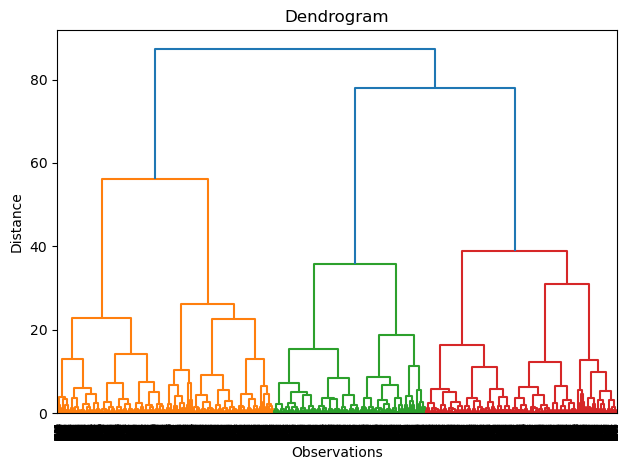

In [22]:

# (3) Dendrogram
plt.figure()
sch.dendrogram(sch.linkage(Z, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


**Interpretation:** Vertical jumps show where merges become large; use this to cross‑check the chosen **k**.

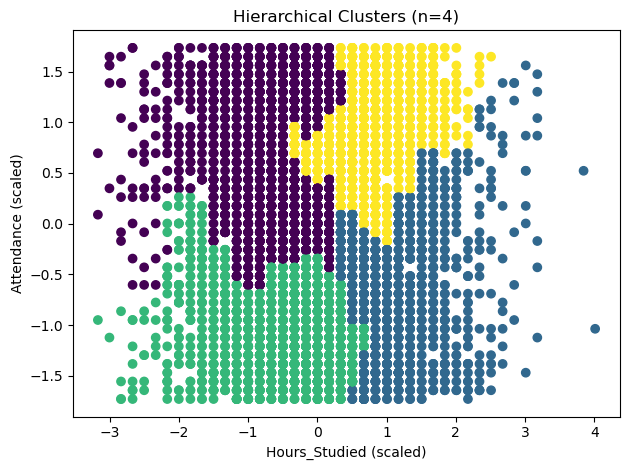

In [23]:

# (4) Agglomerative
k_opt = 4
hc = AgglomerativeClustering(n_clusters=k_opt, metric="euclidean", linkage="ward")
labels_hc = hc.fit_predict(Z)

plt.figure()
plt.scatter(Z[:,0], Z[:,1], c=labels_hc)
plt.title(f"Hierarchical Clusters (n={k_opt})")
plt.xlabel(clu_feats[0] + " (scaled)")
plt.ylabel(clu_feats[1] + " (scaled)")
plt.tight_layout()
plt.show()


**Interpretation:** If Hierarchical makes similar groups to K‑Means, clustering structure is stable.